# University Admission Prediction

## Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the Dataset

In [2]:
dataset = pd.read_csv("Admission.csv")

In [3]:
X = dataset.iloc[:, 1:-1]
y = dataset.iloc[:, -1:]

## Visualizing the Dataset

<AxesSubplot:>

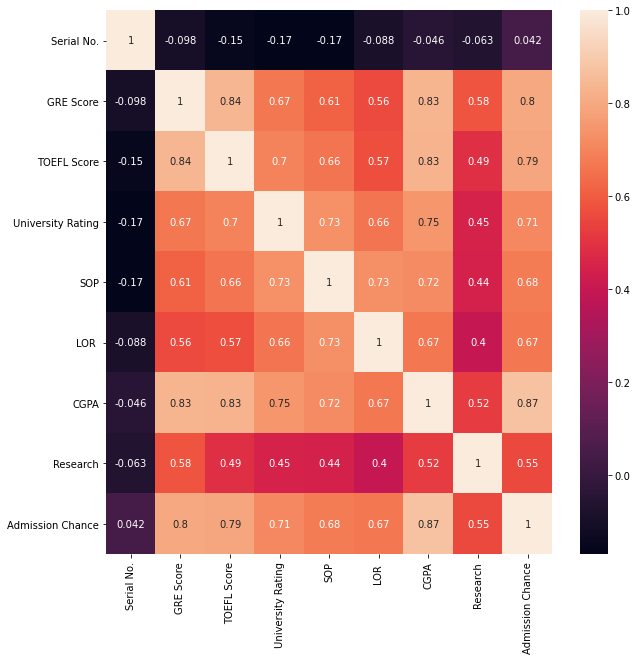

In [4]:
plt.figure(figsize=(10, 10))
sns.heatmap(data=dataset.corr(), annot=True)

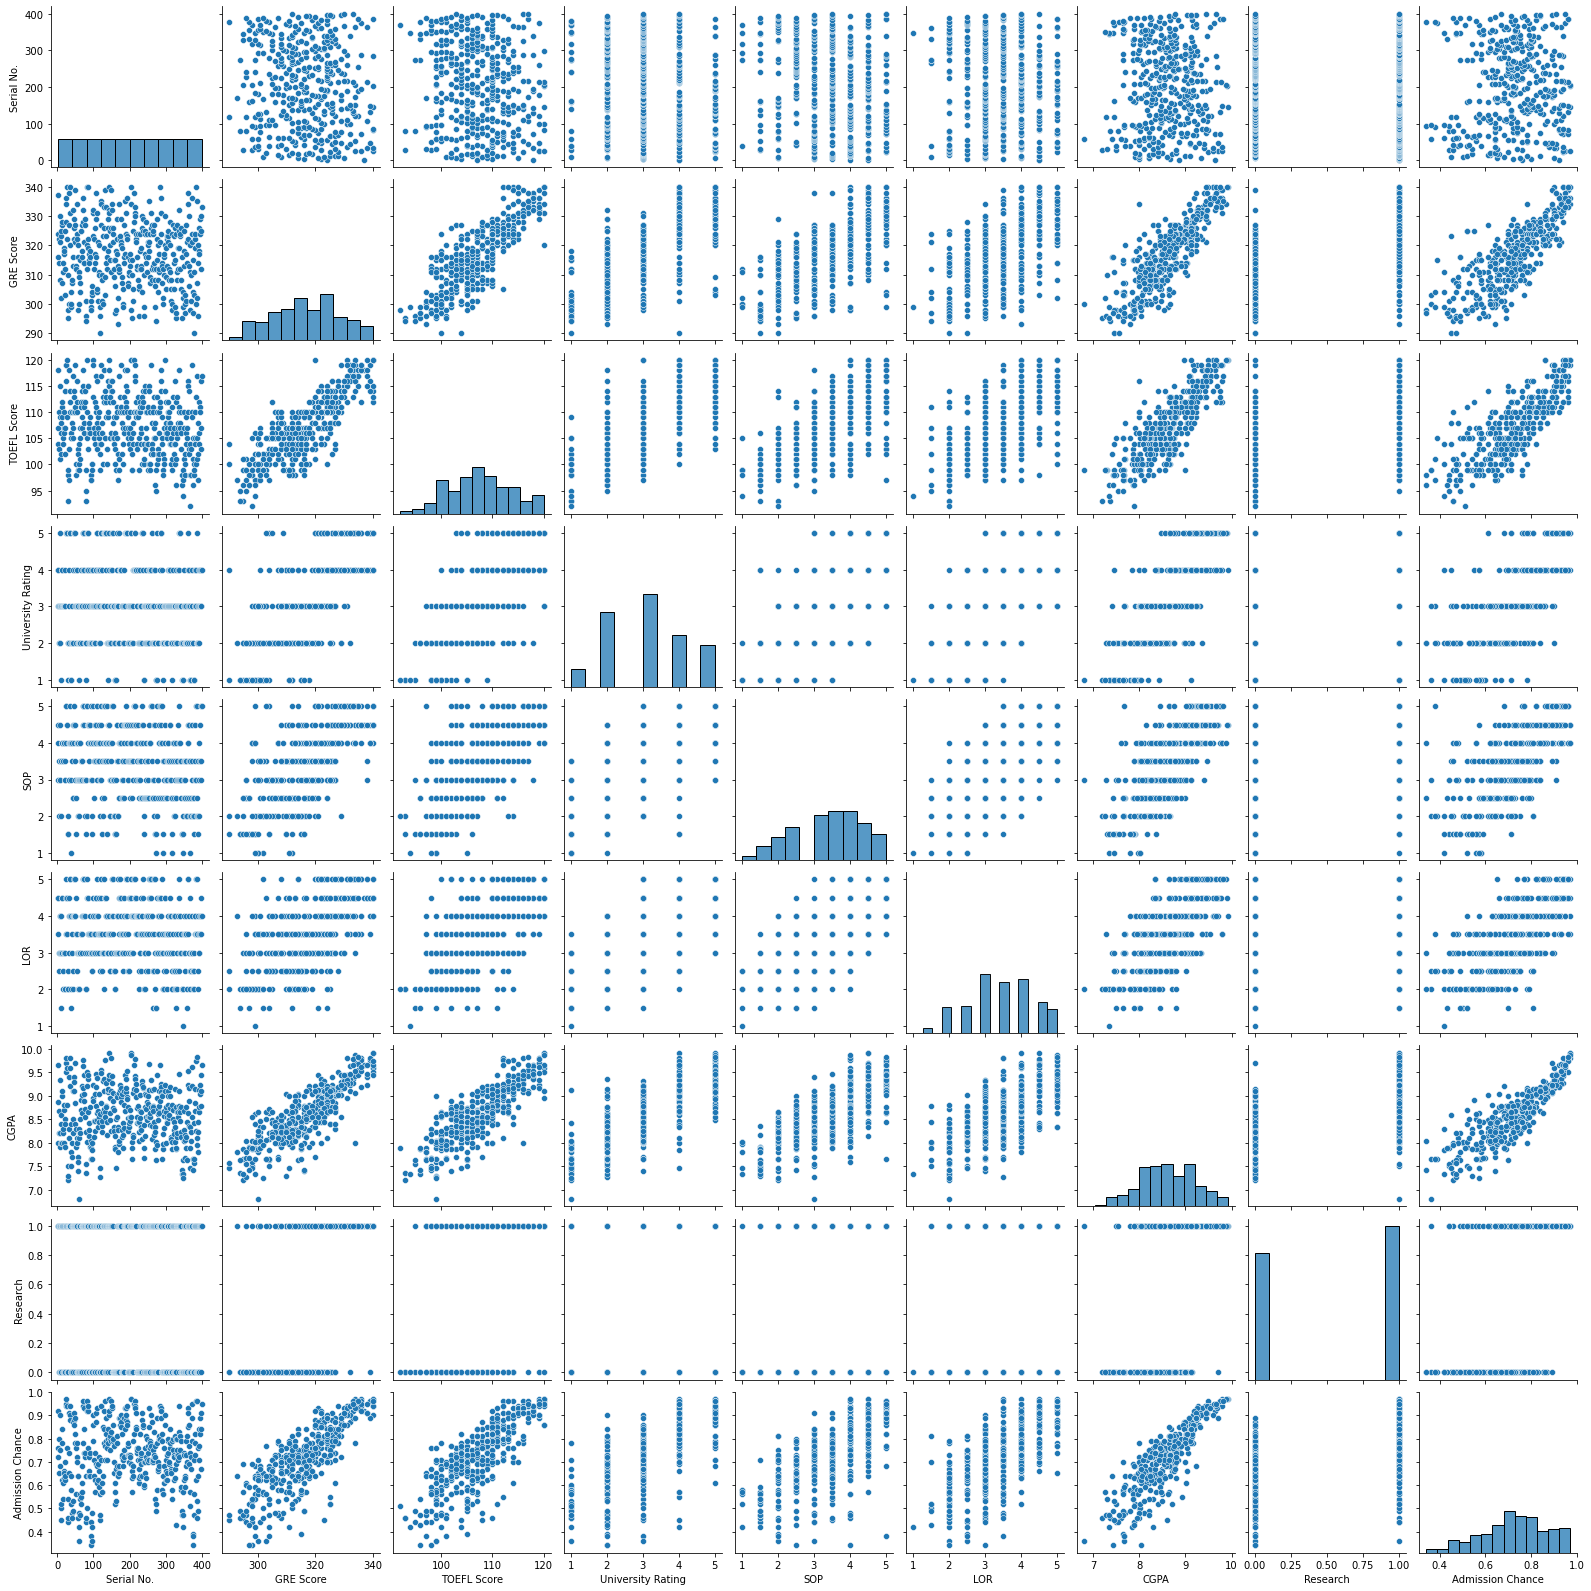

In [5]:
sns.pairplot(data=dataset)

## Creating the Testing and Training Dataset

<AxesSubplot:>

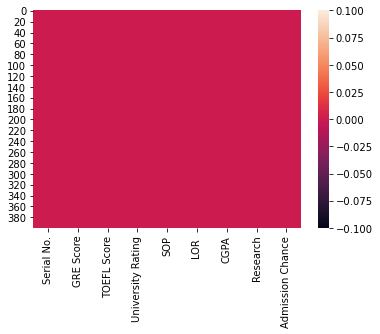

In [6]:
sns.heatmap(dataset.isnull())

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Training the Model

In [8]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [9]:
print("Linear Model Coefficient (m)", regressor.coef_)
print("Linear Model Coefficient (b)", regressor.intercept_)

Linear Model Coefficient (m) [[0.00191728 0.00313645 0.00490436 0.00251545 0.02016788 0.10858803
  0.02212008]]
Linear Model Coefficient (b) [-1.258916]


## Evaluating the Model

In [10]:
y_pred = regressor.predict(X_test)

In [11]:
k = X_test.shape[1]
n = len(X_test)

In [12]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
MAPE = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

In [13]:
print("RMSE =", RMSE, "\nMSE =", MSE, "\nMAE =", MAE, "\nR2 =", r2, "\nAdjusted R2 =", adj_r2, "\nMAPE =", MAPE)

RMSE = 0.066 
MSE = 0.004342306256185831 
MAE = 0.04472287956072605 
R2 = 0.8097085035883974 
Adjusted R2 = 0.7912079414372694 
MAPE = Admission Chance    7.743601
dtype: float64


## Retraining and Visualizing the Results

In [14]:
X = dataset.iloc[:, 1:3]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [17]:
y_pred = regressor.predict(X_test)

In [18]:
k = X_test.shape[1]
n = len(X_test)

In [19]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
MAPE = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

In [20]:
print("RMSE =", RMSE, "\nMSE =", MSE, "\nMAE =", MAE, "\nR2 =", r2, "\nAdjusted R2 =", adj_r2, "\nMAPE =", MAPE)

RMSE = 0.081 
MSE = 0.006487016243570905 
MAE = 0.0582205213903346 
R2 = 0.6761428170120871 
Adjusted R2 = 0.6677309421292842 
MAPE = Admission Chance    9.378936
dtype: float64


In [21]:
from mpl_toolkits.mplot3d import Axes3D
x_surf, y_surf = np.meshgrid(np.linspace(dataset["GRE Score"].min(), dataset["GRE Score"].max(), 100),
                             np.linspace(dataset["TOEFL Score"].min(), dataset["TOEFL Score"].max(), 100))

In [22]:
only_x = pd.DataFrame({"GRE Score": x_surf.ravel(), "TOEFL Score": y_surf.ravel()})

In [23]:
y_pred = regressor.predict(only_x)

In [24]:
y_pred = y_pred.reshape(x_surf.shape)

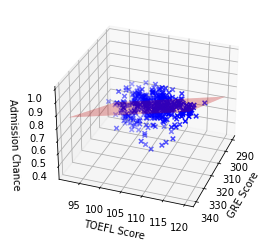

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(dataset["GRE Score"], dataset["TOEFL Score"], dataset["Admission Chance"], c="blue", marker="x")
ax.plot_surface(x_surf, y_surf, y_pred, color="red", alpha=0.3)
ax.set_xlabel("GRE Score")
ax.set_ylabel("TOEFL Score")
ax.set_zlabel("Admission Chance")
ax.view_init(30, 20)